# HYPOTHESIS TESTING: EXERCISES

# Exercise 1: Z-test with fewer empirical data

Repeat Example 1 with a subset of the GC population of the Milky Way, which originally has 81 GCs.

The variable `N_SAMPLE` sets the number of GCs to be used. Try small and large values (e.g., 10, 20, 40). Set it to `None` to use all samples.

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib notebook


# the sample

N_SAMPLE = 40

K_absolute_magnitudes = np.genfromtxt("data/GC_MWG_absolute.csv")
if N_SAMPLE is not None:
    K_absolute_magnitudes = K_absolute_magnitudes[:N_SAMPLE]
sample_size = len(K_absolute_magnitudes)
print(f"SAMPLE SIZE = {sample_size}")


# the model

model_mean = 5.5
model_std = 1.0


# convet to masses

mean_mass_to_light_ratio = 0.822                     # Kovlakas et al. 2021
M_K_solar = 3.29                                     # Blanton & Roweis (2007)
K_band_luminosity = 10.0 ** (
    0.4 * (M_K_solar - K_absolute_magnitudes))       # compute the K-band luminosity (in solar units)
mass = mean_mass_to_light_ratio * K_band_luminosity  # compute the masses using the M/L ratio
log_mass = np.log10(mass)


# report on statistics

sample_mean = np.mean(log_mass)
sample_std = np.std(log_mass)

print(f"MODEL:  Mean = {model_mean:.2f} | Std = {model_std:.2f}")
print(f"SAMPLE: Mean = {sample_mean:.2f} | Std = {sample_std:.2f}")

sample_sem = st.sem(log_mass)
print(f"Standard error of the mean = {sample_sem:.2f}")
print(f"Sigma's of difference: {(model_mean-sample_mean) / sample_sem:.2f}")

# set alpha and compute the critical value(s)
alpha = 0.05
print("Significance level: {:7.3f}".format(alpha))

# compute the p-value and report the result
sample_mean = np.mean(log_mass)
standard_error = model_std / (sample_size ** 0.5)
z_score = (sample_mean - model_mean) / standard_error
pvalue = 2 * st.norm.cdf(-abs(z_score))

print("Sample mean       : {:7.3f}".format(sample_mean))
print("Standard error    : {:7.3f}".format(standard_error))
print("Sample Z score    : {:7.3f}".format(z_score))
print()
print("p-value           : {:7.3g}".format(pvalue))

if pvalue <  alpha:
    print("    ...we reject the null hypothesis. ****")
else:
    print("    ...we cannot reject the null hypothesis. ****")

SAMPLE SIZE = 40
MODEL:  Mean = 5.50 | Std = 1.00
SAMPLE: Mean = 5.44 | Std = 0.59
Standard error of the mean = 0.09
Sigma's of difference: 0.59
Significance level:   0.050
Sample mean       :   5.444
Standard error    :   0.158
Sample Z score    :  -0.352

p-value           :   0.725
    ...we cannot reject the null hypothesis. ****


## Question 1.1: What happens with the $p$-value when we decrease the sample size?

The $p$-value changes, and in general it becomes larger.

## Question 1.2: Why is this happening?

When we decrease the size of the sample, the sample mean's position becomes more uncertain. This is reflect by the $1/\sqrt{N}$ factor in the standard error of the mean. Therefore, it has a higher change to match the model mean.

Equivelently, when we have a smaller sample, there is less evidence to reject a hypothesis. This is observed as a higher $p$-value.

# Exercise 2: the distance of M31

In the file `GC_M31_apparent.dat` we have the **apparent magnitudes** of globular clusters in the Galaxy of Andromeda (M31) [1].

Let's load the data and look at the distributions of the absolute magnitudes in the MWG, along with the apparent magnitudes in M31...

<IPython.core.display.Javascript object>


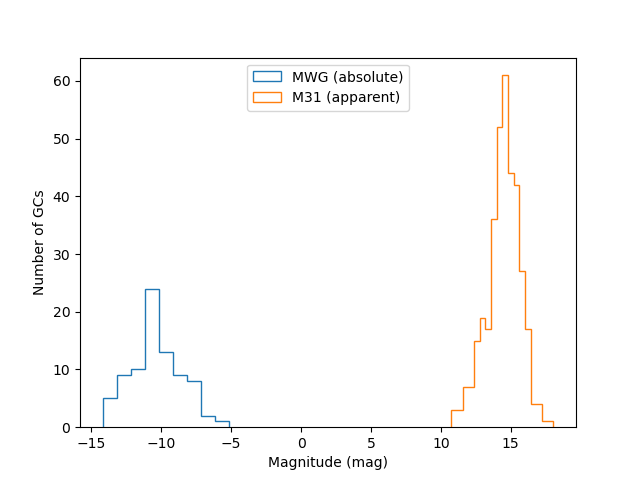

In [2]:
# Load Milky Way globular cluster absolute magnitudes
absolute_MWG = np.genfromtxt("data/GC_MWG_absolute.csv")
apparent_M31 = np.genfromtxt("data/GC_M31_apparent.csv")

plt.figure()
plt.hist(absolute_MWG, bins="fd", histtype="step", label="MWG (absolute)")
plt.hist(apparent_M31, bins="fd", histtype="step", label="M31 (apparent)")
plt.xlabel("Magnitude (mag)")
plt.ylabel("Number of GCs")
plt.legend(loc="upper center")
plt.show()

We notice that the distributions are **similar** both in shape and in scatter!

If we assume that the sample is as **complete** as in the Milky Way, and that there is **no fundamental difference** between GC populations in the two galaxies (e.g., different mass-to-light ratio, GC formation physics), then the mean absolute magnitude **is expected to be the same** in the two galaxies.

Assuming that the absolute magnitude of the M31 GCs is the same as that of the Milky Way galaxy (MWG), **we can compute the distance of M31**!

The difference between the apparent and absolute magnitude is the *distance modulus* $\mu$:

$$ \mu = m - M $$

which in turn is related to the distance:

$$ \mu = 5\log_{10}\frac{D}{\mathrm{pc}} - 5 $$

Therefore:
$$ m = M + 5 \log_{10}\frac{D}{\mathrm{pc}} - 5 $$

For external galaxies, where Mpc is more convenient:
$$ m = M + 5 \log_{10}\frac{D}{\mathrm{Mpc}} + 25 $$

By solving for D, we can estimate the distance:
$$ D = 10^{\frac{\mu}{5} - 5} \quad [\mathrm{Mpc}] $$

The uncertainties on the mean apparent and mean absolute magnitude (and therefore the distance modulus) are propaged to the uncertainty on the distance. Using **uncertainty propagation** we have:

$$ \sigma_\mu = \sqrt{\sigma_m^2 + \sigma_M^2} $$

and

$$ \sigma_D = \frac{\ln{10}}{5} \times D \times \sigma_\mu $$

In [3]:
# compute the mean values...
mean_apparent = np.mean(apparent_M31)
mean_absolute = np.mean(absolute_MWG)     # we assume that absolute_M31 == absolute_MGW

# ...and the standard errors
mean_apparent_err = st.sem(apparent_M31)
mean_absolute_err = st.sem(absolute_MWG)

# report
print(f"Mean apparent (M31): {mean_apparent:6.2f} +/- {mean_apparent_err:4.2f} mag")
print(f"Mean absolute (MWG): {mean_absolute:6.2f} +/- {mean_absolute_err:4.2f} mag")

# compute the distance modulus and it's uncertainty
distance_mod = mean_apparent - mean_absolute
distance_mod_err = (mean_absolute_err ** 2.0 + mean_apparent_err ** 2.0) ** 0.5
print(f"Distance modulus   : {distance_mod:6.2f} +/- {distance_mod_err:4.2f} mag")

# now compute the distance in Mpc, as well as it's uncertainty
D_M31 = 10.0 ** ((mean_apparent - mean_absolute) / 5.0 - 5)
D_M31_err = np.log(10) / 5.0 * D_M31 * distance_mod_err
print(f"Distance of M31    : {D_M31:6.3f} +/- {D_M31_err:.3f} Mpc")

Mean apparent (M31):  14.46 +/- 0.06 mag
Mean absolute (MWG): -10.32 +/- 0.20 mag
Distance modulus   :  24.78 +/- 0.21 mag
Distance of M31    :  0.904 +/- 0.087 Mpc


This is not a standard distance measurement method!  If we want to validate our procedure, we would need to confirm the derived distance using an independent measurment. 

There are hundreds of distance estimates of M31. Here we will use the distance from *Ribas et al. 2005* (https://ui.adsabs.harvard.edu/abs/2005ApJ...635L..37R/abstract) who used the eclipsing binary star distance method, to measure the distance of M31: $0.772 \pm 0.044\ \mathrm{Mpc}$.

Can we quantify the agreement between the two methods? 

Or in other words... is the difference in the estimates consistent with $0$ given the uncertainties of the measurements?

## Question 2.1: How do you check if the difference is consistent with 0?

If the two distances are the same, then we would expect a $0$ difference, with a standard deviation which depends on the uncertainties of both of the estimates: $\sim \mathcal{N}(0, \sigma)$. Consequently, the $Z$-score is $(d_1-d_2) / \sqrt{e_1^2 + e_2^2}$ where $d1, d2$ are the two distances, and $e_1, e_2$ their uncertainties.

In [4]:
D_R05 = 0.772
D_R05_err = 0.044

# use `D_M31` and `D_M31_err` from above
difference = D_M31 - D_R05 
difference_uncertainty = (D_M31_err ** 2.0 + D_R05_err ** 2.0) ** 0.5
print(f"Difference: {difference:.3f} +/- {difference_uncertainty:.3f} Mpc")

Z_score = difference / difference_uncertainty
p_value = 1 - (st.norm.cdf(abs(Z_score)) - st.norm.cdf(-abs(Z_score)))

print(f"Z score: {Z_score:.3f} sigmas")
print(f"p-value: {p_value:.3f}")

Difference: 0.132 +/- 0.098 Mpc
Z score: 1.351 sigmas
p-value: 0.177


# Exercise 3: Are the magnitudes of the MWG and M31 GCs normally-distributed?

In [5]:
statistic, pvalue = st.shapiro(absolute_MWG)
print("p-value (MWG)  = {:.3g}".format(pvalue))

statistic, pvalue = st.shapiro(apparent_M31)
print("p-value (M31)  = {:.3g}".format(pvalue))

p-value (MWG)  = 0.675
p-value (M31)  = 0.00102


# Exercise 4: Repeat exercise 3 but using the Anderson-Darling normality test

In [6]:
print("\nMWG:\n", st.anderson(absolute_MWG))
print("\nM31:\n", st.anderson(apparent_M31))


MWG:
 AndersonResult(statistic=0.30257325976113236, critical_values=array([0.551, 0.627, 0.753, 0.878, 1.044]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

M31:
 AndersonResult(statistic=1.7939448091848362, critical_values=array([0.57 , 0.649, 0.779, 0.908, 1.08 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


## Question 4.1: how do you interpret the resulting outputs?

The output is returning the value of the statistic computed from our data, and two lists: critical values and the corresponding significance levels. These two lists depend on the sample size of our data.

We note that the critical value increases as the significance level decreases. Therefore, if our test resulted in a statistic which is smaller than a given critical value, then the $p$-value is larger than the corresponding significance level.

## Question 4.2: is the result the same as in the Shapiro-Wilk test?

While we cannot compute the exact $p$-values for the A-D test, the results are consistent: in the case of the MWG, the $p$-value from the S-W test we found is above 15\%, whereas in the case of M31 it is below 1%.

# Exercise 5: do the Milky-Way and M31 GC samples follow the same distribution?

First, we compute the absolute magnitudes of the M31 GCs using the distance we found in Exercise 2.

<IPython.core.display.Javascript object>


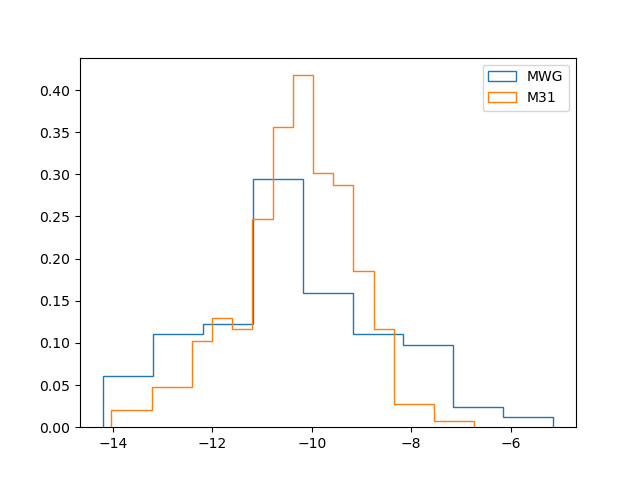

In [7]:
distance_mod_M31 = 24.78                      # this is not from literature, but from Exercise 2
absolute_M31 = apparent_M31 - distance_mod_M31
plt.figure()
plt.hist(absolute_MWG, bins="fd", density=True, histtype="step", label="MWG")
plt.hist(absolute_M31, bins="fd", density=True, histtype="step", label="M31")
plt.legend(loc="upper right")
plt.show()

We can check whether the absolute magnitudes in M31 and MWG are consistent using the **two-sample K-S test**.

In [8]:
statistic, pvalue = st.ks_2samp(absolute_M31, absolute_MWG)
print("statistic = {:.3g}".format(statistic))
print("p-value   = {:.3g}".format(pvalue))

statistic = 0.135
p-value   = 0.163


## Question 5.1: can we assume that the distributions are the same?

The $p$-value is larger than any typical significance level. But again, language... The two sample distributions are different. However, *we cannot reject the hypothesis that the two samples are drawn from the same distribution*.

This means, that considering only this data, we can use the null hypothesis as a valid assumption, until additional evidence is provided that will make us reconsider our assumptions!

## Question 5.2: Was this a *fair test*? Do you see any way that we may have biased this result?

We computed the absolute magnitude of the M31 using the distance we found in Exercise 2. This distance was estimated by assuming that the mean values of the absolute magnitudes is the same! Therefore, the mean values of the two samples were **forced to be equal**!

**This is an critical issue**: in Science we often use the **same data** for calibrating methods, fitting models, etc. It is hard to spot the various ways we bias our results. Well-constructed experiments and proper statistical analysis are required for solid conclusions! 

## Question 5.3: Did you expect this result based on our findings in Exercises 3 and 4?

One might claim
> 1. The MWG sample is normally distributed
> 2. The M31 sample is not normally dsitributed
> 3. The MWG and M31 samples are following the same distribution

In reality, there is no inconsistency! It's the language that is wrong. We should say:

> We performed three *independent* tests, and at with a 5% significance level we:
> 1. cannot reject that the MWG sample is normally distributed
> 2. reject that the M31 sample is normally distributed
> 3. cannot reject that the MWG and M31 are drawn from the same distribution

# Exercise 6: What would happen if the size of the two samples was doubled?

Repeat Exersice 5 with double the sample size! First, answer these questions regarding your expectations:

## Question 6.1: are the distributions exactly the same as in with the original sample size?
## Question 6.2: would the K-S test result into the same statistic $D$ (distance of CDFs)?
## Question 6.3: would the $p$-value be the same?


To simulate this, we will take each value twice! 

In [9]:
statistic, pvalue = st.ks_2samp(list(absolute_M31)*2, list(absolute_MWG)*2)
print("statistic = {:.3g}".format(statistic))
print("p-value   = {:.3g}".format(pvalue))

statistic = 0.135
p-value   = 0.0146


## Question 6.4: Where you correct in your expectations?

1. The distributions **are** the same since we just scaled up the occurance of each value in the samples.
2. Since the distributions are the same, the CDFs will be the same, and their maximum distance will not change!
3. No. We have more samples now. We are providing "more evidence" towards disagreement... the $p$-value will be smaller.

# Exercise 7: Linear correlation and monotonicity in different samples

## Question 7.1: What are the correlation and rank coefficients for a "blob" of (x, y) data for $x, y \in \mathcal{N}(0, 1)$? What do they tell us?

The correlation/rank coefficients are pointing towards no correlation, supported by the high $p$-values. 

## Question 7.2: What will happen if we change one data point to be an outlier $x_n = (-10, -10)$?

Adding the "outlier", affects Pearson's $r$ significantly. A linear correlation is indicated by the small $p$-value, reflecting that we cannot reject the hypothesis that there is correlation. 

However, the rank coefficients and corresponding $p$-values tell a different story: we cannot assume that the data are monotonic under the presence of one outlier.

Real data often are "contaminated", and we have to be careful with our conclusions!

### Uncomment the commented line of code to change the point.

PEARSON  : r = 0.569  |  p-value = 6.48e-10
SPEARMAN : r = 0.170  |  p-value = 0.0916
KENDALL  : t = 0.112  |  p-value = 0.1

FIT RESULTS (with linregress):
    slope          : 0.59 +/-   0.09
    intercept      : -0.16 +/-   0.12
    corr. coeff. R : +0.569127
    R squared      : 0.323905
    p-value        : 6.48237e-10


<IPython.core.display.Javascript object>


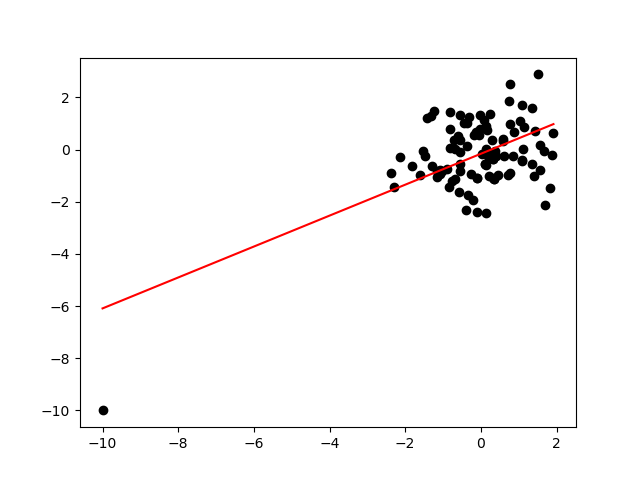

In [10]:
x = st.norm().rvs(100)
y = st.norm().rvs(100)

# uncomment this to change the last point to an outlier
x[-1], y[-1] = (-10, -10)

r, pvalue = st.pearsonr(x, y)
print("PEARSON  : r = {:.3f}  |  p-value = {:.3g}".format(r, pvalue))
r, pvalue = st.spearmanr(x, y)
print("SPEARMAN : r = {:.3f}  |  p-value = {:.3g}".format(r, pvalue))
r, pvalue = st.kendalltau(x, y)
print("KENDALL  : t = {:.3f}  |  p-value = {:.3g}".format(r, pvalue))

print()
res = st.linregress(x, y)
slope, intercept, rvalue, pvalue, slope_stderr = res
intercept_stderr = res.intercept_stderr                # for compatibility this value is extract like this
print("FIT RESULTS (with linregress):")
print("    slope          : {:.2f} +/- {:6.2f}".format(slope, slope_stderr))
print("    intercept      : {:.2f} +/- {:6.2f}".format(intercept, intercept_stderr))
print("    corr. coeff. R : {:+.6f}".format(rvalue))
print("    R squared      : {:.6f}".format(rvalue**2.0))
print("    p-value        : {:.6g}".format(pvalue))

xx = np.linspace(min(x), max(x), 10)
yy = xx * slope + intercept
plt.figure()
plt.plot(x, y, "ko")
plt.plot(xx, yy, "r-")
plt.show()


# Bonus Exercise 1: the standard error of the mean

Here, we take the standard normal distribution, i.e. $\mathcal{N}(0, 1)$. Then, we select the sample size (`n_samples`) and perform `n_experiments` samplings. By computing the sample standard error of the mean, we arrive at a large number of estimates of the population standard error of the mean.

In the figure, we plot the distribution of the estimates, along with their mean, and the expected population standard error of the mean since we know the underlying distributions $\sigma$.

Try different values for the number of samples (`n_samples`). What do you notice?

<IPython.core.display.Javascript object>


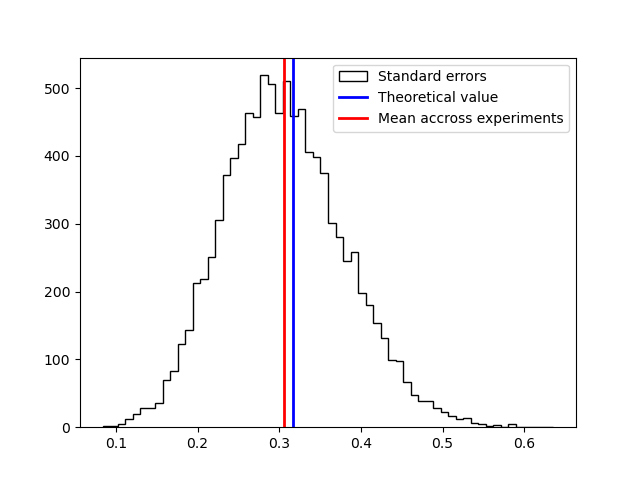

In [11]:
distribution = st.norm(0.0, 1.0)
n_samples = 10
n_experiments = 10000

expected_std_err = distribution.std() / n_samples**0.5

std_errors = [st.sem(distribution.rvs(size=n_samples)) for i in range(n_experiments)]

mean_across_experiments = np.mean(std_errors)

plt.figure()
plt.hist(std_errors, color="k", bins="fd", histtype="step", label="Standard errors")
plt.axvline(expected_std_err, color="b", lw=2, label="Theoretical value")
plt.axvline(mean_across_experiments, color="r", lw=2, label="Mean accross experiments")
plt.legend(loc="upper right")
plt.show()

### Question 1: the sample standard error of the mean changes everytime we sample.  Why is that?

Any estimate based on a sample of a random variable, is a random variable itself. Consequently, the SEM is an estimate of the standard deviation of the mean, and has it's own standard error! For $n=10$, $m = 0.0 \pm 0.31$ but also SEM $= 0.31 \pm 0.07$.

Advice: don't try to put an error on $0.07$... it's not worth it!

### Question 2: how does the mean value of the SEMs compare to the theoretical value?

Since a sample cannot span the full range of the population - there is always some probability that we miss the extreme values. Consequently, the SEM **always** underestimates the standard deviation of the mean! The smaller the sample, the larger the discrepancy. In fact, it has been proven (Gurland J. and Tripathi R. C. [1971]).

However, this bias is usually a lot smaller than the uncertainty on the SEM, so we can neglect it!

### Question 3: Is the sample SEM following a normal distribution?

It looks "normal", but since the SEM is bounded (positive quantity), it must not be!

# Bonus Exercise 2: Pitfalls of uncertainty propagation
Above we used the classic error propagation formula to estimate the uncertainty of a function $f = f(x_1, x_2, \cdots, x_n)$ given the uncertainties of the independent variables:

$$ \sigma_f^2 = \sigma_{x_1} \left(\frac{\partial f}{\partial x_1} \right)^2 
              + \sigma_{x_2} \left(\frac{\partial f}{\partial x_2} \right)^2
              \cdots
              + \sigma_{x_n} \left(\frac{\partial f}{\partial x_n} \right)^2
$$

The formula is based on a first-degree approximation using Taylor expanstion. Consequently, it is accurate only for normally-distributed data! Also it does not account for correlations between the variables (they are independent), which requires additional terms. 

More importantly, it is valid only for linear combinations of independent variables! The expression we used above, $10^X$ where $X$ is normally-distributed, cannot follow the normal distribution itself (e.g., it is defined only for positive values, and therefore is not symmetric).

When calculating uncertainties, we might significantly underestimate/overestimate them if we do not account for correlations, deviations from normality, non-linear combinations etc.

An extreme example is:
$$ Z = X - Y $$
where $X \in \mathcal{N}\left(0, 1\right)$ and $Y = X$ which means that $Y \in \mathcal{N}\left(0, 1\right)$. 

Using error propagation without accounting for the correlation, we have $\sigma_Z = \sqrt{\sigma_X^2+\sigma_Y^2} = \sqrt{2}$. 

Actually it is $\sigma_Z = \sqrt{\sigma_X^2 + \sigma_Y^2 - 2\rho \sigma_X \sigma_Y} = 0$ where $\rho=1$ is the correlation coefficient in this case!

## sample if not sure...
Alternatively, since we know the distribution of the variables, we can find the uncertainty by sampling them (accounting for correlation if necessary) and applying the transformations we want! In our example, the variables are independent.

Distance of M31: 0.904 +/- 0.087


<IPython.core.display.Javascript object>


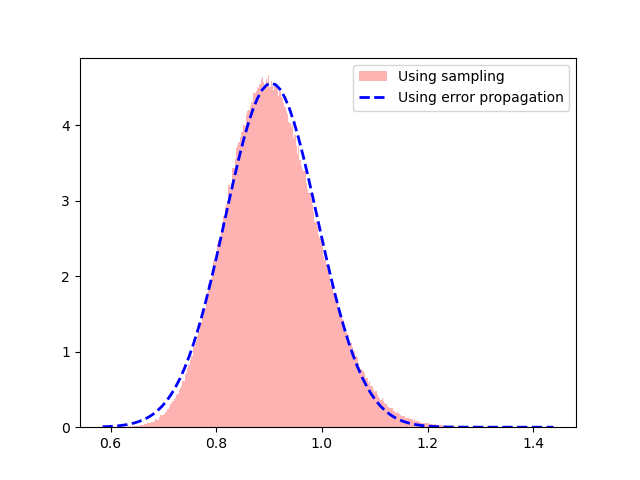

In [12]:
dist_app = st.norm(mean_apparent, mean_apparent_err)
dist_abs = st.norm(mean_absolute, mean_absolute_err)

N = 1000000
samples = 10.0**((dist_app.rvs(N) - dist_abs.rvs(N)) / 5.0 - 5.0)

D_mean = np.mean(samples)
D_mean_err = np.std(samples)

xx = np.linspace(min(samples), max(samples), 100)

print(f"Distance of M31: {D_M31:.3f} +/- {D_M31_err:.3f}")

plt.figure()
plt.hist(samples, bins="fd", density=True, color="r", alpha=0.3, label="Using sampling")
# plt.plot(xx, st.norm(D_mean, D_mean_err).pdf(xx), "r-", lw=2, label="Using sampling mean +/- std")
plt.plot(xx, st.norm(D_M31, D_M31_err).pdf(xx), "b--", lw=2, label="Using error propagation")

plt.legend(loc="upper right")
plt.show()